In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Loading Data</b>

In [28]:
import os
print(os.getcwd())
os.chdir('/Users/dineshchandgeetharavichandran/Desktop/Dinesh/Project/Data-Science/Machine Learning Programs/Logistic Regression') 

/Users/dineshchandgeetharavichandran/Desktop/Dinesh/Project/Data-Science/Machine Learning Programs/Logistic Regression


In [29]:
train = pd.read_csv('titanic_train.csv')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Analyse Data</b>

<Axes: >

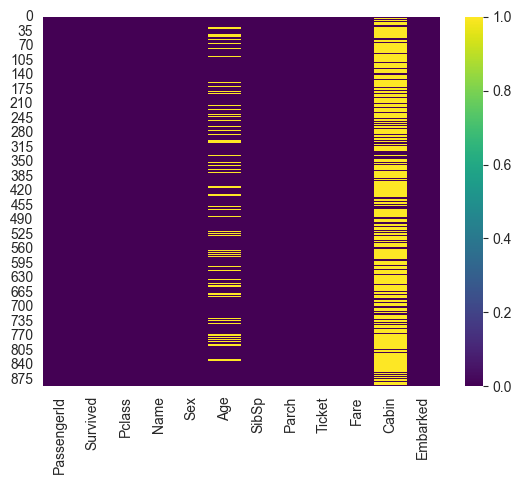

In [32]:
sns.heatmap(train.isnull(),cmap='viridis')

Analyse missing Cabin Values

In [33]:
missing_values = pd.isnull(train["Cabin"])
 
# Counting missing values in the "Team" column
missing_values_count = missing_values.sum()

print("missing values",missing_values_count)

#total_values = train["Age"].count()

total_values = len(train)

print("total values",total_values)

missing_age_percent = (missing_values_count / total_values) * 100

print("missing_age_percent",missing_age_percent)

missing values 687
total values 891
missing_age_percent 77.10437710437711


Analyse missing Age Values

In [34]:
missing_values = pd.isnull(train["Age"])
 
# Counting missing values in the "Team" column
missing_values_count = missing_values.sum()

print("missing values",missing_values_count)

#total_values = train["Age"].count()

total_values = len(train)

print("total values",total_values)

missing_age_percent = (missing_values_count / total_values) * 100

print("missing_age_percent",missing_age_percent)

missing values 177
total values 891
missing_age_percent 19.865319865319865


<b>Analyse Survival Data</b>

/var/folders/8_/wfp348kn2dq3bn994w75sqrm0000gp/T/ipykernel_10806/3813607065.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Survived', ylabel='count'>

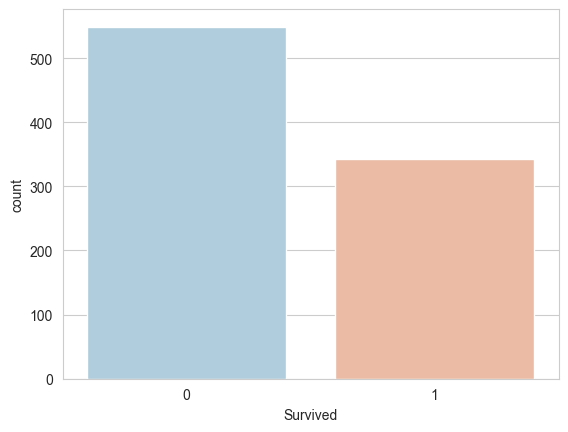

In [35]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

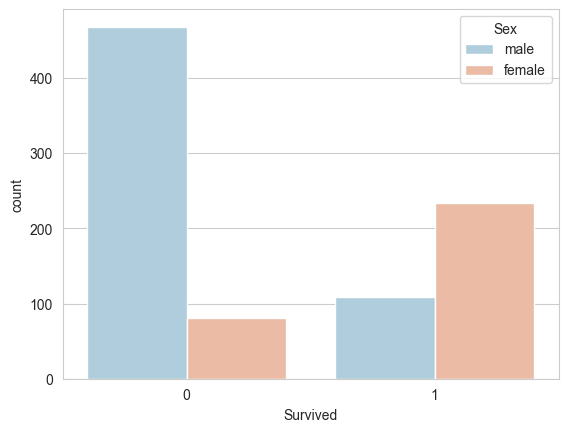

In [36]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:


# Group by 'Class' and calculate the sum for each group
grouped_sum = train['Pclass'].value_counts()

print("Sum of Passengers in Each Class:")
print(grouped_sum)


Sum of Passengers in Each Class:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

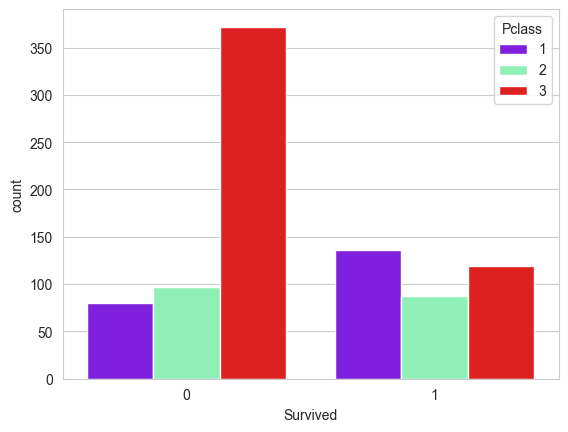

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/var/folders/8_/wfp348kn2dq3bn994w75sqrm0000gp/T/ipykernel_10806/1781747146.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age'>

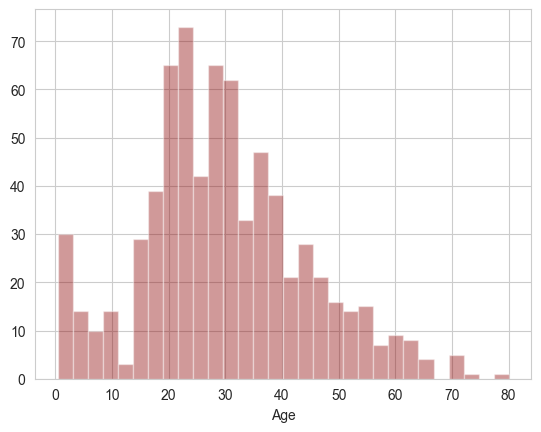

In [40]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

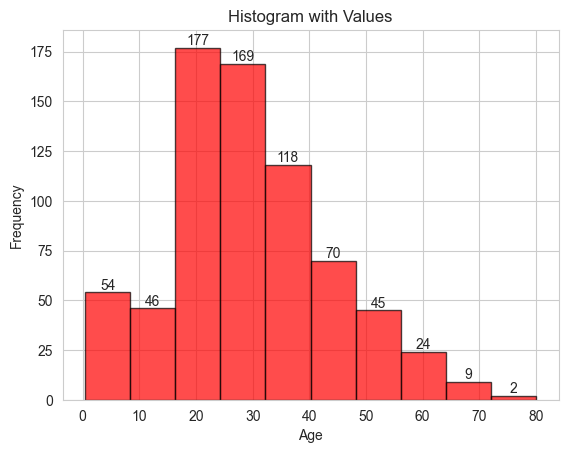

In [41]:
#train['Age'].hist(bins=30,color='darkred',alpha=0.7)

import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(train['Age'], bins=10, color='red', edgecolor='black', alpha=0.7)

# Annotate each bar with its count
for count, patch in zip(counts, patches):
    # Get the center of the bar
    bin_center = patch.get_x() + patch.get_width() / 2
    ax.text(
        bin_center,                  # X-coordinate (center of the bar)
        count,                       # Y-coordinate (height of the bar)
        f'{int(count)}',             # Text to display (convert count to int)
        ha='center',                 # Horizontal alignment
        va='bottom',                 # Vertical alignment
        fontsize=10                  # Adjust font size
    )

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Histogram with Values')

# Show the plot
plt.show()

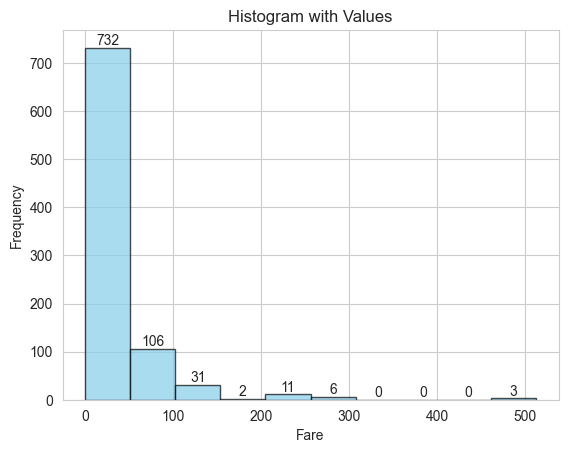

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(train['Fare'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Annotate each bar with its count
for count, patch in zip(counts, patches):
    # Get the center of the bar
    bin_center = patch.get_x() + patch.get_width() / 2
    ax.text(
        bin_center,                  # X-coordinate (center of the bar)
        count,                       # Y-coordinate (height of the bar)
        f'{int(count)}',             # Text to display (convert count to int)
        ha='center',                 # Horizontal alignment
        va='bottom',                 # Vertical alignment
        fontsize=10                  # Adjust font size
    )

# Add labels and title
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Histogram with Values')

# Show the plot
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

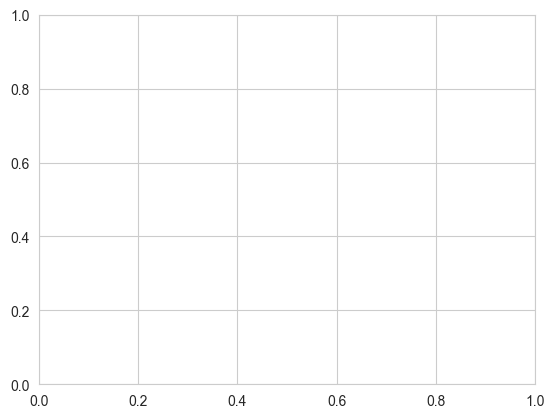

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Create the histogram
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(train['Embarked'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Annotate each bar with its count
for count, patch in zip(counts, patches):
    # Get the center of the bar
    bin_center = patch.get_x() + patch.get_width() / 2
    ax.text(
        bin_center,                  # X-coordinate (center of the bar)
        count,                       # Y-coordinate (height of the bar)
        f'{int(count)}',             # Text to display (convert count to int)
        ha='center',                 # Horizontal alignment
        va='bottom',                 # Vertical alignment
        fontsize=10                  # Adjust font size
    )

# Add labels and title
ax.set_xlabel('Fare')
ax.set_ylabel('Frequency')
ax.set_title('Histogram with Values')

# Show the plot
plt.show()


In [26]:
import cufflinks as cf
cf.go_offline()

In [44]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

/var/folders/8_/wfp348kn2dq3bn994w75sqrm0000gp/T/ipykernel_1337/1683851715.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

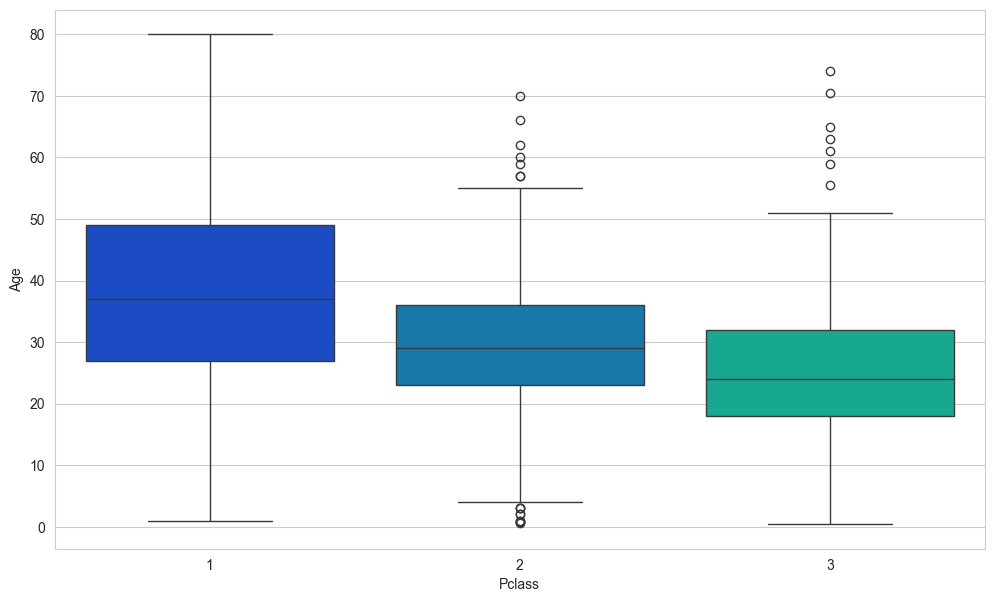

In [71]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

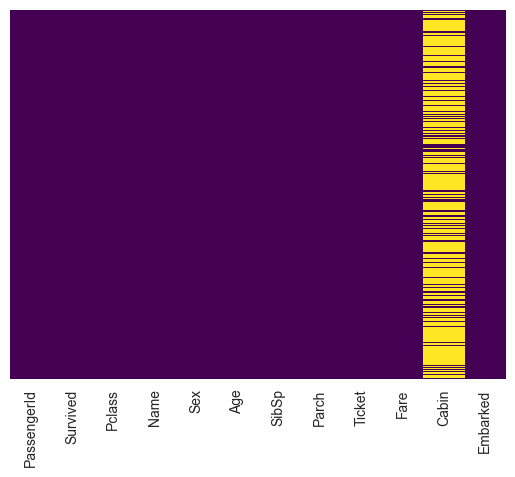

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train.drop('Cabin',axis=1,inplace=True)

In [23]:
train.dropna(inplace=True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<b>convert categorical variables into dummy or indicator variables</b>

In [26]:
pd.get_dummies(train['Sex'])


,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [27]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [28]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [29]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [30]:
Pclass = pd.get_dummies(train['Pclass'],drop_first=True)
Pclass

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
886,True,False
887,False,False
888,False,True
889,False,False


In [31]:
train = pd.concat([train,sex,embark],axis=1)



In [141]:
#train.drop(['male','Q','S'],axis=1,inplace=True)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


<b>Remove unused columns</b>

In [33]:
train.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [150]:
train.drop(['Pclass'],axis=1,inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    bool   
 7   Q         889 non-null    bool   
 8   S         889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


In [35]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = train.drop('Survived',axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, 
                                                    random_state=101)

In [38]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.7750,False,False,True
651,2,18.0,0,1,23.0000,False,False,True
2,3,26.0,0,0,7.9250,False,False,True
690,1,31.0,1,0,57.0000,True,False,True
196,3,24.0,0,0,7.7500,True,True,False
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,False,False,True
840,3,20.0,0,0,7.9250,True,False,True
338,3,45.0,0,0,8.0500,True,False,True
524,3,24.0,0,0,7.2292,True,False,False


In [39]:
y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int64

In [40]:
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.05,True,False,True
613,3,24.0,0,0,7.75,True,True,False
615,2,24.0,1,2,65.00,False,False,True
337,1,41.0,0,0,134.50,False,False,False
718,3,24.0,0,0,15.50,True,True,False
...,...,...,...,...,...,...,...,...
792,3,24.0,8,2,69.55,False,False,True
828,3,24.0,0,0,7.75,True,True,False
732,2,29.0,0,0,0.00,True,False,True
669,1,37.0,1,0,52.00,False,False,True


In [41]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression

In [57]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [58]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]])

In [45]:

data = [3, 22.0, 1, 0, 7.2500, True, False, True]
df2 = pd.DataFrame([data], columns=["Pclass","Age","SibSp","Parch","Fare","male","Q","S"])
df2

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.25,True,False,True


In [66]:
predictions_new = logmodel.predict(df2)
predictions_new

array([0])

In [71]:


data1 = [3, 41, 1, 0, 11, False, False, False]
df1 = pd.DataFrame([data1], columns=["Pclass","Age","SibSp","Parch","Fare","male","Q","S"])
df1


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,41,1,0,11,False,False,False


In [72]:
predictions_new = logmodel.predict(df1)
predictions_new

array([0])